In [1]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* **Matplotlib**
* **Seaborne**
* **Pandas**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applicatione e.g. | too high |

When using matplotlib, your life will be easier when you operate at the plt level, and gets harder quickly when you move into the OO level.

# plt example

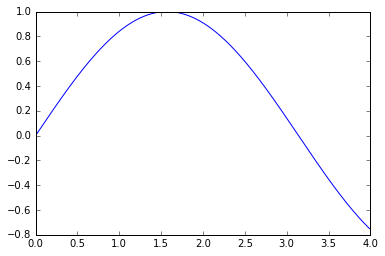

In [7]:
x_data = np.arange(0, 4, .01)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
plt.show()

## Weird

`plt` was imported as a library, but it appears to be keeping some state between the last two lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

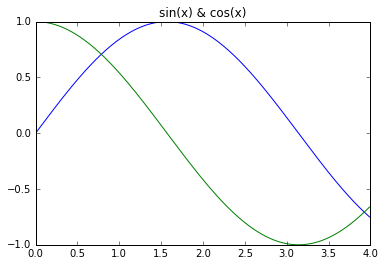

In [18]:
x_data = np.arange(0, 4, .01)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
#We can actually keep adding state here, and it will be reflected when we finally call show.
plt.plot(x_data, np.cos(x_data))
plt.title("sin(x) & cos(x)")
plt.show()

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

# Behind the curtain
Behind the curtain, there *are* objects.

![Matplotlib diagram](http://matplotlib.org/_images/fig_map.png)



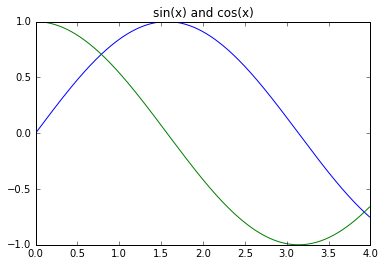

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
ax.set_title('sin(x) and cos(x)')
plt.show()

In this example, the fact that state is maintained is less surprising.

But that call to `plt.show` is still weird! There's still some kind of state being stored by plt...

# Mix 'n' Match

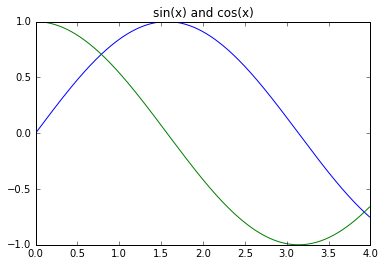

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
plt.title('sin(x) and cos(x)')
plt.show()

# Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

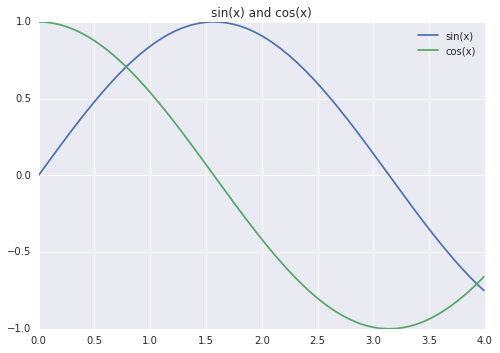

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.yscale('log')
plt.plot(x_data, y_data, label='sin(x)')
ax.plot(x_data, np.cos(x_data), label='cos(x)')
plt.title('sin(x) and cos(x)')
ax.legend()

# Multiple plots

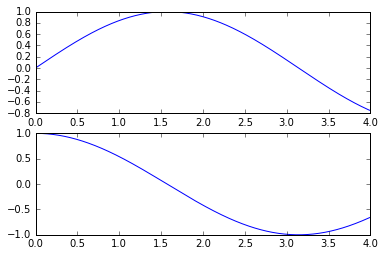

In [37]:
fig = plt.figure()
fig, ax_list = plt.subplots(2, 1)
y_funcs = [np.sin, np.cos]
for subp, y_func in zip(ax_list, y_funcs):
    subp.plot(x_data, y_func(x_data))

# What about pandas?

In [38]:
import pandas as pd

In [64]:
df = pd.DataFrame({'x':x_data, 'sinx':np.sin(x_data), 'cosx':np.cos(x_data)})
df = df.set_index('x')
df.head()

,cosx,sinx
x,,
0.00,1.00000,0.000000
0.01,0.99995,0.010000
0.02,0.99980,0.019999
0.03,0.99955,0.029996
0.04,0.99920,0.039989


In [65]:
ax = df.cosx.plot

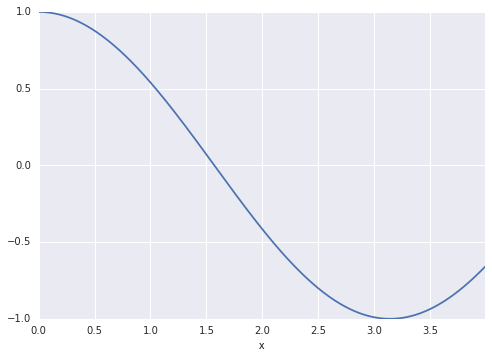

In [67]:
ax = df.cosx.plot()

Calling the plot method on a pandas series returns a familiar matplotlib axes object.

In [73]:
fig.legend?

(-1, 1)

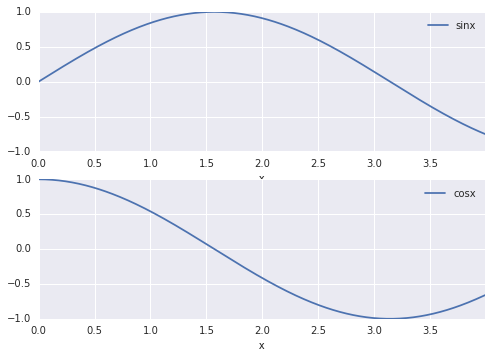

In [96]:
fig, ax_list = plt.subplots(2,1)
cols = ['sinx', 'cosx']
for ax, col in zip(ax_list, cols):
    df[col].plot(ax=ax)
    ax.legend()
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-1, top=1)

Notice in the above plot that you pass the axis you want to draw on to the plot method. This is typical.

In [99]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

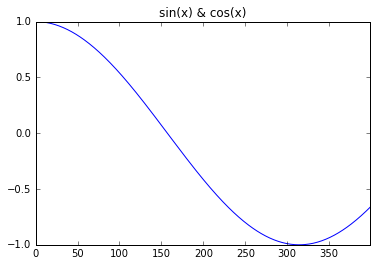

In [52]:
ax = df.cosx.plot()
ax.set_title('sin(x) & cos(x)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e454710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fed65d0>]], dtype=object)

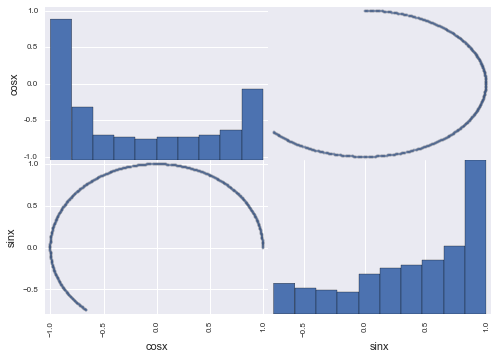

In [98]:
pd.scatter_matrix(df)

# Seaborn

In [104]:
import seaborn as sns

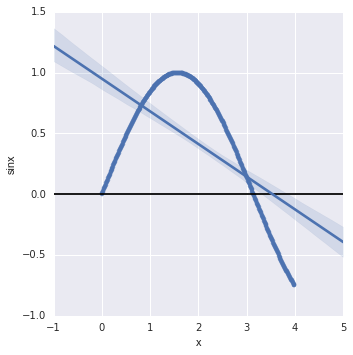

In [107]:
#Seaborn
seaborn_grid = sns.lmplot(x="x", y="sinx", data=df.reset_index())
#Combined with 
plt.hlines(0, -1, 5)

In [108]:
seaborn_grid.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eab1410>]], dtype=object)